In [1]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K
import random


import tensorflow as tf

from PIL import Image
# import matplotlib.pyplot as plt
import numpy as np
import random

# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)


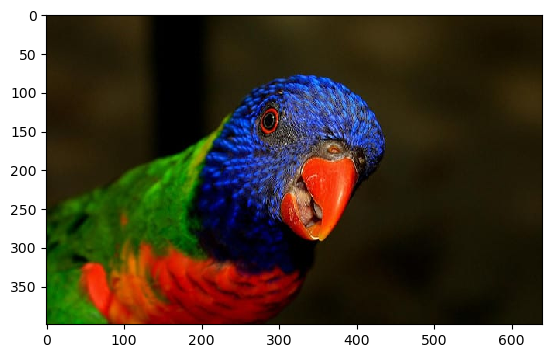

In [2]:
pyplot.imshow(img)

In [3]:
print(len(it))

1


In [4]:
print(it[0].shape)

(1, 399, 640, 3)


In [5]:
batch = it.next()
print(batch.shape)

(1, 399, 640, 3)


(399, 640, 3)


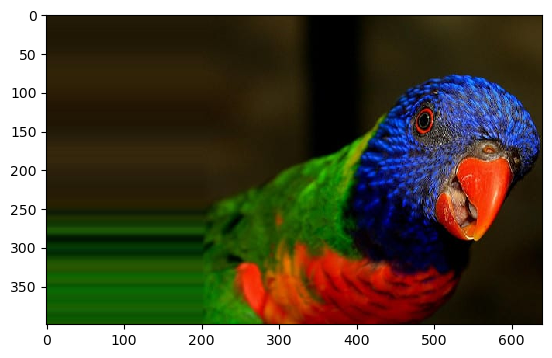

In [6]:
single_img = batch[0].astype('uint8')
print(single_img.shape)
pyplot.imshow(single_img)

(1, 399, 640, 3)
(399, 640, 3)


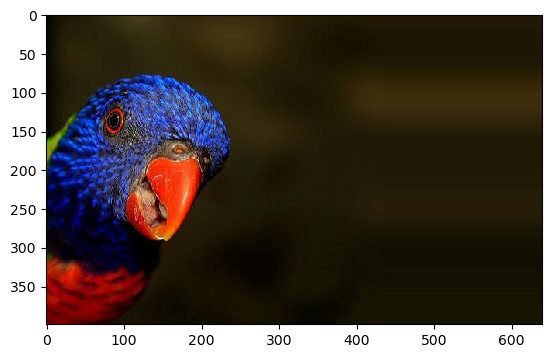

In [7]:
batch2 = it.next()
print(batch2.shape)
single_img2 = batch2[0].astype('uint8')
print(single_img2.shape)
pyplot.imshow(single_img2)

(1, 399, 640, 3)
(399, 640, 3)


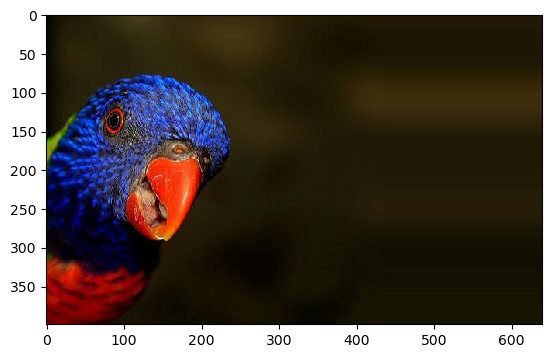

In [8]:
batch3 = it.next()
print(batch3.shape)
single_img3 = batch3[0].astype('uint8')
print(single_img3.shape)
pyplot.imshow(single_img3)

(1, 399, 640, 3)
(399, 640, 3)


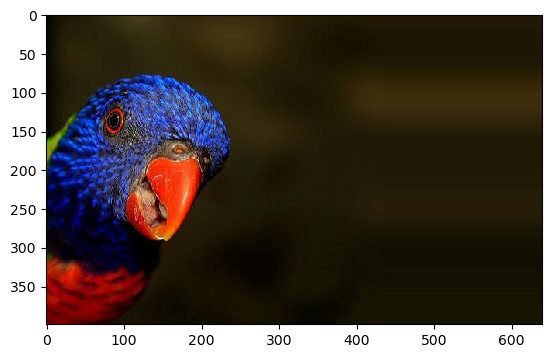

In [9]:
batch4 = it.next()
print(batch4.shape)
single_img4 = batch4[0].astype('uint8')
print(single_img4.shape)
pyplot.imshow(single_img4)

In [10]:
print(len(it))

1


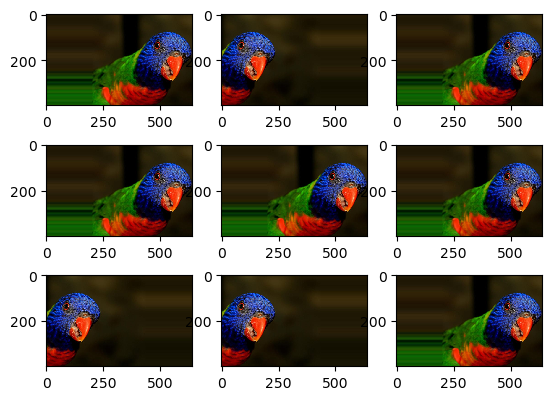

In [11]:
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

See that the augmented data is generated from the itertaor: "it = datagen.flow(samples, batch_size=1)".
This iterator generates samples indefinitely. 

In the above case, the iterator is within a for loop of 9 steps. Do notice that the original image DOES NOT appear in the generated images.  

## Creating a combined generator of augmented and original images

In [12]:
# Data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Original images generator
original_datagen = ImageDataGenerator(rescale=1./255)

# Generate augmented images from the original data directory
train_generator = train_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='input')

# Generate original images from the original data directory
original_generator = original_datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='input')

# Combine the generators using the `keras.preprocessing.image.Iterator` class
combined_generator = zip(train_generator, original_generator)



Found 179 images belonging to 1 classes.
Found 179 images belonging to 1 classes.


In [13]:
print(len(original_generator))
print(len(train_generator))

6
6


In [14]:
(augmented_images_batch, original_images_batch) = next(combined_generator)
print("FOR THE AUGMENTED IMAGES")
print(type(augmented_images_batch))
print(len(augmented_images_batch))
print(tf.reduce_min(augmented_images_batch), tf.reduce_max(augmented_images_batch))
print("FOR THE ORIGINAL IMAGES")
print(type(original_images_batch))
print(len(original_images_batch))
print(tf.reduce_min(original_images_batch), tf.reduce_max(original_images_batch))

FOR THE AUGMENTED IMAGES
<class 'tuple'>
2


2023-06-04 17:38:31.532076: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-06-04 17:38:31.558049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-04 17:38:31.558524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 with Max-Q Design computeCapability: 7.5
coreClock: 1.23GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 357.69GiB/s
2023-06-04 17:38:31.558706: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-06-04 17:38:31.559806: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-06-04 17:38:31.560871: I tensorflow/st

tf.Tensor(0.014495573, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
FOR THE ORIGINAL IMAGES
<class 'tuple'>
2
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


One sample of the augmented images
2
(32, 150, 150, 3)


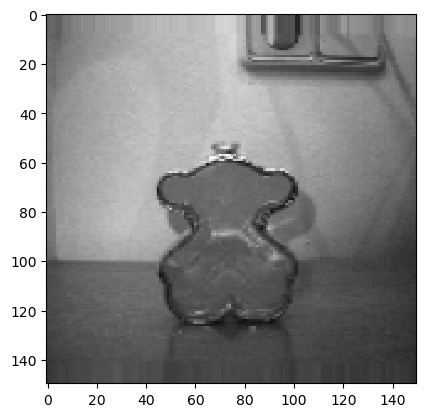

In [15]:
print("One sample of the augmented images")
print(len(augmented_images_batch))
input_batch_augmented = augmented_images_batch[0]
print(input_batch_augmented.shape)
single_img = input_batch_augmented[0]
pyplot.imshow(single_img)

One sample of the original images
2
(32, 150, 150, 3)


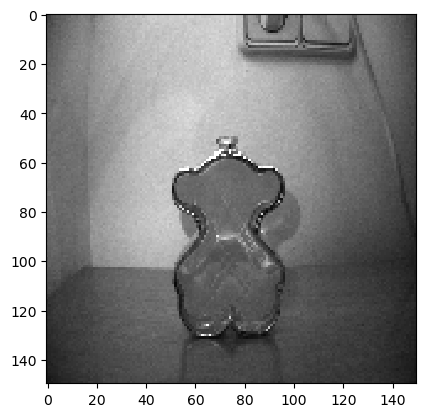

In [16]:
print("One sample of the original images")
print(len(original_images_batch))
input_batch_original = original_images_batch[0]
print(input_batch_original.shape)
single_img_orgn = input_batch_original[0]
pyplot.imshow(single_img_orgn)

Showing multiple augmented images

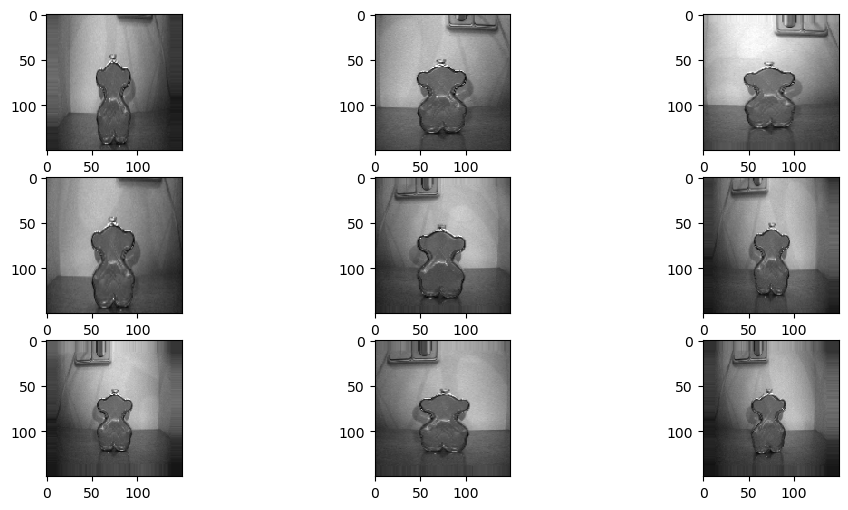

In [23]:
pyplot.figure(figsize=(12, 6))
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	(augmented_images_batch, _) = next(combined_generator)
	input_batch_augmented = augmented_images_batch[0]
	single_img = input_batch_augmented[0]
	# plot raw pixel data
	pyplot.imshow(single_img)
# show the figure
pyplot.show()